# Model training and testing

This notebook is basically for training a Naive Bayes model to classify whether a posts in the r/mcgill subrredit is an issue or not.

We have marked the posts from r/CollegeRants as posts with issues (=1) and a selected posts from the r/mcgill as posts with no issues (=0)

In [ ]:
import pandas as pd


# read data from reddit_posts.csv and topic2_posts.csv
reddit_posts = pd.read_csv('reddit_posts.csv')
topic2_posts = pd.read_csv('topic2_posts.csv')

# merge the two dataframes
merged = pd.concat([reddit_posts, topic2_posts])


In [ ]:
merged.columns

Index(['text', 'issue'], dtype='object')

### We have 8345 posts which are not issues and 14741 posts with issues.

In [ ]:
merged['issue'].value_counts()

1    14741
0     8345
Name: issue, dtype: int64

# Building a Naive Bayes model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(merged['text'])

print(vectorizer.get_feature_names_out())

['00' '000' '0000000' ... '𝒘𝒆𝒍𝒍' '𝒘𝒉𝒊𝒄𝒉' '𝒘𝒊𝒍𝒍']


In [ ]:
spamham_countVectorizer.shape

label=merged['issue']
X=spamham_countVectorizer
y=label

<Axes: >

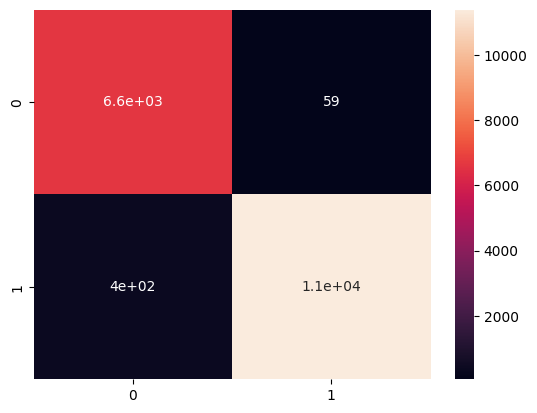

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

y_predict_train=NB_classifier.predict(X_train)
y_predict_train

cm=confusion_matrix(y_train,y_predict_train)

sns.heatmap(cm,annot=True)

[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1656
           1       0.99      0.96      0.98      2962

    accuracy                           0.97      4618
   macro avg       0.96      0.97      0.97      4618
weighted avg       0.97      0.97      0.97      4618



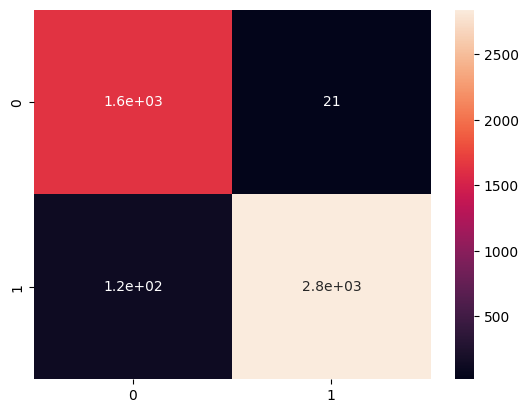

In [ ]:
y_predict_test=NB_classifier.predict(X_test)
print (y_predict_test)

cm=confusion_matrix(y_test,y_predict_test)


sns.heatmap(cm,annot=True)

print(classification_report(y_test,y_predict_test))

# Testing

In [ ]:
import pandas as pd
import zstandard as zstd
import json

#set confgiuration to display all columns
pd.set_option('display.max_columns', None)

# Path to your .zst file
zst_file_path = 'mcgill_submissions.zst'

# Decompress .zst file
with open(zst_file_path, 'rb') as compressed:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(compressed) as reader:
        decompressed_data = reader.read().decode('utf-8')

# Assuming each line in the decompressed data is a separate JSON object
data = [json.loads(line) for line in decompressed_data.splitlines()]

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame to verify
df.head()

,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,contest_mode,created_utc,distinguished,domain,edited,gilded,hidden,hide_score,id,is_crosspostable,is_reddit_media_domain,is_self,is_video,link_flair_css_class,link_flair_richtext,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,retrieved_on,rte_mode,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,url,whitelist_status,downs,num_reports,banned_by,name,likes,clicked,saved,ups,approved_by,selftext_html,created,report_reasons,user_reports,mod_reports,quarantine,from_id,from_kind,from,post_hint,preview,author_cakeday,view_count,approved_at_utc,banned_at_utc,can_mod_post,pinned,mod_note,mod_reason_by,mod_reason_title,crosspost_parent,crosspost_parent_list,subreddit_subscribers,media_metadata,author_flair_template_id,category,content_categories,is_original_content,media_only,post_categories,pwls,removal_reason,visited,wls,link_flair_background_color,previous_visits,link_flair_template_id,author_created_utc,author_fullname,is_meta,gildings,is_robot_indexable,author_patreon_flair,all_awardings,total_awards_received,allow_live_comments,discussion_type,author_premium,awarders,removed_by,removed_by_category,treatment_tags,poll_data,upvote_ratio,is_created_from_ads_ui,retrieved_utc,top_awarded_type,url_overridden_by_dest,gallery_data,is_gallery,call_to_action,collections
0,True,david_a_garcia,None,engineering,"[{'e': 'text', 't': 'Electrical Eng '10'}]",Electrical Eng '10,None,richtext,True,True,False,1265431507,None,self.mcgill,False,0.0,False,False,aypo9,True,False,True,False,None,[],None,dark,text,False,None,{},True,4,0.0,False,all_ads,/r/mcgill/comments/aypo9/is_this_working_yet/,1.522891e+09,markdown,1,None,{},,True,False,False,mcgill,t5_2rhkw,r/mcgill,public,None,self,NaN,NaN,is this working yet?,https://www.reddit.com/r/mcgill/comments/aypo9...,all_ads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,[deleted],NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1299562966,None,self.mcgill,False,NaN,False,NaN,fzkkf,NaN,NaN,True,NaN,None,NaN,None,NaN,NaN,NaN,None,{},NaN,13,NaN,False,NaN,/r/mcgill/comments/fzkkf/advice_for_u0s/,NaN,NaN,5,NaN,NaN,I'm just finishing up my first year at McGill ...,NaN,NaN,NaN,mcgill,t5_2rhkw,NaN,NaN,NaN,default,NaN,NaN,Advice for U0's?,http://www.reddit.com/r/mcgill/comments/fzkkf/...,NaN,0.0,NaN,NaN,t3_fzkkf,NaN,False,False,5.0,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",1.299563e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,jakob5860,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1300316295,None,self.mcgill,False,NaN,False,NaN,g5h9n,NaN,NaN,True,NaN,None,NaN,None,NaN,NaN,NaN,None,{},NaN,1,NaN,False,NaN,/r/mcgill/comments/g5h9n/ama_request_sean_turner/,NaN,NaN,2,NaN,NaN,,NaN,NaN,NaN,mcgill,t5_2rhkw,NaN,NaN,NaN,self,NaN,NaN,AMA Request: Sean Turner,http://www.reddit.com/r/mcgill/comments/g5h9n/...,NaN,0.0,NaN,NaN,t3_g5h9n,NaN,False,False,2.0,NaN,None,1.300320e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,mricon,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1

In [ ]:
#combine title and selftext into one column called text
df['text'] = df['title'] + ' ' + df['selftext']

In [ ]:
df_new2 = df[['text']].copy()

In [ ]:
df_new2

,text
0,is this working yet?
1,Advice for U0's? I'm just finishing up my firs...
2,AMA Request: Sean Turner
3,I work in McGill central IT. AMA. I am a senio...
4,So how was the protest today?
...,...
60894,computer science grades minimum cut off [removed]
60895,HIST 219 [removed]
60896,HIST 219?? [removed]
60897,MGCR 222 with Prof Ody [removed]


In [ ]:
# Use NB_classifier on the df_new2 dataframe
spamham_countVectorizer=vectorizer.transform(df_new2['text'])
print(spamham_countVectorizer)

y_predict_test=NB_classifier.predict(spamham_countVectorizer)
print (y_predict_test)


  (0, 13847)	1
  (0, 24939)	1
  (0, 27481)	1
  (0, 27725)	1
  (1, 1595)	1
  (1, 1641)	1
  (1, 1951)	3
  (1, 1966)	1
  (1, 2374)	1
  (1, 2406)	2
  (1, 2584)	1
  (1, 2746)	3
  (1, 2829)	2
  (1, 2972)	2
  (1, 3251)	1
  (1, 3514)	1
  (1, 3567)	1
  (1, 3791)	1
  (1, 4616)	2
  (1, 4773)	1
  (1, 5483)	1
  (1, 5978)	1
  (1, 6289)	1
  (1, 6573)	1
  (1, 8207)	1
  :	:
  (60894, 6070)	1
  (60894, 6986)	1
  (60894, 11557)	1
  (60894, 16210)	1
  (60894, 17494)	1
  (60894, 20863)	1
  (60894, 21930)	1
  (60895, 447)	1
  (60895, 12407)	1
  (60895, 20863)	1
  (60896, 447)	1
  (60896, 12407)	1
  (60896, 20863)	1
  (60897, 457)	1
  (60897, 16045)	1
  (60897, 17487)	1
  (60897, 19559)	1
  (60897, 20863)	1
  (60897, 27377)	1
  (60898, 457)	1
  (60898, 16045)	1
  (60898, 17487)	1
  (60898, 19559)	1
  (60898, 20863)	1
  (60898, 27377)	1
[1 0 0 ... 0 0 0]


In [ ]:
df_new2['predicted_issue'] = y_predict_test

In [ ]:
df_new2

,text,predicted_issue
0,is this working yet?,1
1,Advice for U0's? I'm just finishing up my firs...,0
2,AMA Request: Sean Turner,0
3,I work in McGill central IT. AMA. I am a senio...,0
4,So how was the protest today?,1
...,...,...
60894,computer science grades minimum cut off [removed],1
60895,HIST 219 [removed],0
60896,HIST 219?? [removed],0
60897,MGCR 222 with Prof Ody [removed],0


In [ ]:
df_new2['predicted_issue'].value_counts()

0    33606
1    27293
Name: predicted_issue, dtype: int64

# Clustering

In [ ]:
# filter out all 1 from predicted issue column
df_new3 = df_new2[df_new2['predicted_issue'] == 1]

In [ ]:
df_new3

,text,predicted_issue
0,is this working yet?,1
4,So how was the protest today?,1
6,"Can you help me choose a residence? Hi, I rece...",1
7,"So /r/mcgill, tell me about yourselves! There ...",1
8,"""McGill Library Sucks"" by Rupert Common - So t...",1
...,...,...
60886,Lost backpack in Leacock building Hello! I bel...,1
60887,Undergrad Major &amp; Grad school !? [removed],1
60889,Undergrad Major &amp; Grad school !? [removed],1
60893,Looking for roommates for the 2023-2024 school...,1


In [ ]:
# check if word mental health is in the text column
df_new4 = df_new3[df_new3['text'].str.contains('mental health|stress|depression|anxiety|mental illness|counseling|support|well-being|coping|self-care|psychiatry|psychology|treatment|medication|coping strategies|peer support|self-esteem|suicidal ideation|trauma', case=False, na=False)]

In [ ]:
df_new4.shape

(1689, 2)

In [ ]:
df_new4.head(10)

,text,predicted_issue
101,How do you all feel about the MUNACA strike? I...,1
123,Best beer selection downtown (Dep) Marché Cosm...,1
160,Arts Undergrads Vote to Strike on Nov10 [Other...,1
178,REPOST (old one did not show up): Request From...,1
181,A Request From a Fellow McGillian.. I am askin...,1
187,Questions for MUNACA and MUNACA supporters. 1...,1
191,McGill student tries to win opening at Igloofe...,1
221,Looking for a workout buddy for next term. I w...,1
298,Sooo three midterms in one day. What are my op...,1
330,"For the Freshmen class of 2014, a breakdown of...",1


In [ ]:
# Randomly select 5000 rows from df_new3
df_new5 = df_new3.sample(n=5000)

In [ ]:
# make df_new5 equal to df_new4
df_new5 = df_new4

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')  # Download necessary NLTK data

# Initialize stemmer
stemmer = PorterStemmer()

# Function to tokenize and stem text
def preprocess_text(text):
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed)

# Preprocess the synopses
df_new5['processed_synopses'] = df_new5['text'].apply(preprocess_text)

# Remove stop words


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
/var/folders/_1/slbty4054pvb722zx16dmj7w0000gn/T/ipykernel_63805/3206551826.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new5['processed_synopses'] = df_new5['text'].apply(preprocess_text)


In [ ]:
df_new5

,text,predicted_issue,processed_synopses
101,How do you all feel about the MUNACA strike? I...,1,how do you all feel about the munaca strike ? ...
123,Best beer selection downtown (Dep) Marché Cosm...,1,best beer select downtown ( dep ) marché cosmo...
160,Arts Undergrads Vote to Strike on Nov10 [Other...,1,art undergrad vote to strike on nov10 [ other ...
178,REPOST (old one did not show up): Request From...,1,repost ( old one did not show up ) : request f...
181,A Request From a Fellow McGillian.. I am askin...,1,a request from a fellow mcgillian .. i am ask ...
...,...,...,...
60635,How to shake exam anxiety Kinda sorta anxious ...,1,how to shake exam anxieti kinda sorta anxiou a...
60677,fieldhouse/gym exams are so incredibly fucked ...,1,fieldhouse/gym exam are so incred fuck up just...
60771,I need to make a decision I started at McGill ...,1,i need to make a decis i start at mcgill just ...
60783,Returning during add/drop for Winter 2023 Hi a...,1,"return dure add/drop for winter 2023 hi all , ..."


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df_new5['processed_synopses'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 10  # Adjust based on your analysis
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

# loop through different k and test silhouette score

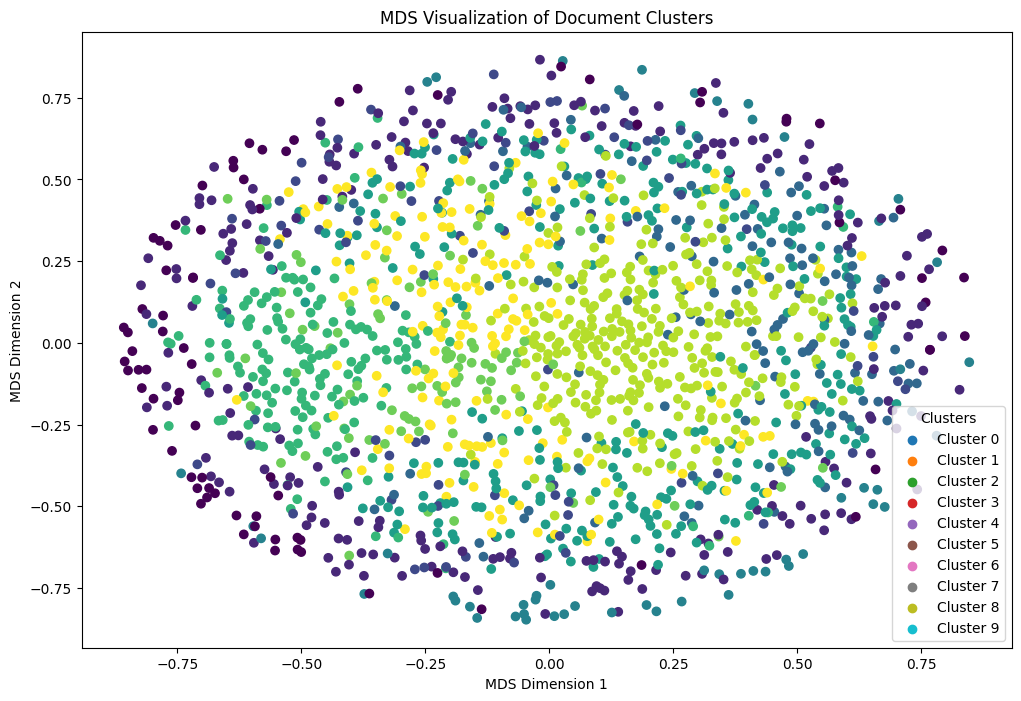

In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(1 - similarity_matrix)  # Using 1 - similarity_matrix for distance

# Extract the coordinates
xs, ys = pos[:, 0], pos[:, 1]

# Create a scatter plot of the projection
plt.figure(figsize=(12, 8))
scatter = plt.scatter(xs, ys, c=clusters)  # Color by cluster assignments

# Create labels for the clusters
labels = np.unique(clusters)
for i in labels:
    plt.scatter([], [], label='Cluster ' + str(i))

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Visualization of Document Clusters')
plt.legend(title='Clusters')
plt.show()


In [ ]:
def get_top_features_cluster(tfidf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label)  # indices for each cluster
        x_means = np.mean(tfidf_array[id_temp], axis = 0)  # mean tf-idf value for each feature in the cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats]  # indices with top features
        features = tfidf_vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

top_words_per_cluster = get_top_features_cluster(tfidf_matrix.toarray(), km.labels_, 10)  # Adjust 10 to get more or fewer words


In [ ]:
cluster_names = []
for num, df in enumerate(top_words_per_cluster):
    print(f"Cluster {num} words:")
    print(df)
    cluster_name = '-'.join(df['features'].values[:10])  # Name cluster based on top 3 words
    cluster_names.append(cluster_name)
    print(f"Named: {cluster_name}\n")

# Optionally, you can add these names to your original DataFrame
df_new5['Cluster_Name'] = [cluster_names[i] for i in clusters]


Cluster 0 words:
    features     score
0      remov  0.434513
1    support  0.064462
2     health  0.064391
3  psycholog  0.062315
4     mental  0.061689
5        and  0.045823
6    anxieti  0.038621
7         of  0.038044
8     stress  0.029966
9      power  0.029895
Named: remov-support-health-psycholog-mental-and-anxieti-of-stress-power

Cluster 1 words:
  features     score
0      the  0.070310
1      and  0.059968
2   health  0.056823
3       to  0.055554
4      for  0.052581
5   mental  0.047418
6  support  0.044255
7       of  0.043493
8       it  0.039920
9       is  0.039290
Named: the-and-health-to-for-mental-support-of-it-is

Cluster 2 words:
    features     score
0  psycholog  0.176919
1         to  0.131323
2       grad  0.096097
3         in  0.088396
4   research  0.083147
5        the  0.079981
6     school  0.074495
7        and  0.072783
8      appli  0.065996
9         my  0.064354
Named: psycholog-to-grad-in-research-the-school-and-appli-my

Cluster 3 words:
  fea

/var/folders/_1/slbty4054pvb722zx16dmj7w0000gn/T/ipykernel_63805/57062187.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new5['Cluster_Name'] = [cluster_names[i] for i in clusters]


In [ ]:
df_new5

,text,predicted_issue,processed_synopses,Cluster_Name
101,How do you all feel about the MUNACA strike? I...,1,how do you all feel about the munaca strike ? ...,the-to-and-of-is-that-in-it-thi-for
123,Best beer selection downtown (Dep) Marché Cosm...,1,best beer select downtown ( dep ) marché cosmo...,the-to-and-of-is-that-in-it-thi-for
160,Arts Undergrads Vote to Strike on Nov10 [Other...,1,art undergrad vote to strike on nov10 [ other ...,the-to-and-of-http-we-ssmu-student-com-our
178,REPOST (old one did not show up): Request From...,1,repost ( old one did not show up ) : request f...,you-to-the-your-and-of-that-it-do-is
181,A Request From a Fellow McGillian.. I am askin...,1,a request from a fellow mcgillian .. i am ask ...,you-to-the-your-and-of-that-it-do-is
...,...,...,...,...
60635,How to shake exam anxiety Kinda sorta anxious ...,1,how to shake exam anxieti kinda sorta anxiou a...,the-to-and-of-is-that-in-it-thi-for
60677,fieldhouse/gym exams are so incredibly fucked ...,1,fieldhouse/gym exam are so incred fuck up just...,exam-to-the-and-my-deferr-have-defer-it-of
60771,I need to make a decision I started at McGill ...,1,i need to make a decis i start at mcgill just ...,to-and-my-the-of-in-do-it-that-have
60783,Returning during add/drop for Winter 2023 Hi a...,1,"return dure add/drop for winter 2023 hi all , ...",the-to-and-of-is-that-in-it-thi-for


In [ ]:
# find number of posts in each cluster
df_new5['Cluster_Name'].value_counts()

to-and-my-the-of-in-do-it-that-have                                  330
to-and-the-my-in-it-have-for-of-that                                 299
the-and-health-to-for-mental-support-of-it-is                        237
the-to-and-of-is-that-in-it-thi-for                                  191
the-to-and-of-http-we-ssmu-student-com-our                           171
exam-to-the-and-my-deferr-have-defer-it-of                           141
you-to-the-your-and-of-that-it-do-is                                 103
psycholog-to-grad-in-research-the-school-and-appli-my                 82
remov-support-health-psycholog-mental-and-anxieti-of-stress-power     82
delet-mental-health-cope-psycholog-anxieti-support-and-the-medic      53
Name: Cluster_Name, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(tfidf_matrix, clusters)

print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.008575934770499092


# **Rate My Professors**

In [ ]:
prof = pd.read_csv('all_professor_comments.csv')

In [ ]:
prof.head()

,Comment,Department,School,ProfessorName
0,Had him long ago. He was late to every class....,Economics department,McGill University,George Grantham Grantham
1,"my favourite prof at mcgill! very helpful, re...",Economics department,McGill University,George Grantham Grantham
2,Yawn.... attended class a few times but learne...,Economics department,McGill University,George Grantham Grantham
3,a very poor prof to say the least; can be undu...,Economics department,McGill University,George Grantham Grantham
4,I've taken his class three times now. Best cl...,Economics department,McGill University,George Grantham Grantham


In [ ]:
prof['Comment'].isnull().sum()

5

In [ ]:
# Dorp null values from Comment column
prof = prof.dropna(subset=['Comment'])

In [ ]:
prof['Comment'].isnull().sum()

0

In [ ]:
# Use NB_classifier on the df_new2 dataframe
spamham_countVectorizer=vectorizer.transform(prof['Comment'])
print(spamham_countVectorizer)

y_predict_test=NB_classifier.predict(spamham_countVectorizer)
print (y_predict_test)

prof['predicted_issue'] = y_predict_test



  (0, 851)	1
  (0, 1595)	1
  (0, 1837)	1
  (0, 1872)	1
  (0, 2068)	1
  (0, 2212)	1
  (0, 2406)	2
  (0, 2798)	1
  (0, 4547)	1
  (0, 5044)	1
  (0, 5479)	1
  (0, 7574)	1
  (0, 7739)	1
  (0, 7743)	1
  (0, 8487)	1
  (0, 9515)	1
  (0, 10460)	2
  (0, 10570)	1
  (0, 11551)	2
  (0, 11890)	3
  (0, 12128)	4
  (0, 12367)	1
  (0, 13847)	1
  (0, 13878)	1
  (0, 14589)	1
  :	:
  (23344, 16493)	1
  (23344, 17057)	1
  (23344, 17492)	1
  (23344, 19559)	1
  (23344, 20354)	1
  (23344, 23947)	1
  (23344, 24508)	1
  (23344, 24839)	2
  (23344, 24880)	1
  (23344, 24939)	1
  (23344, 25159)	1
  (23344, 27139)	1
  (23344, 27696)	1
  (23345, 1595)	1
  (23345, 2406)	1
  (23345, 11643)	1
  (23345, 12128)	1
  (23345, 13847)	2
  (23345, 14413)	1
  (23345, 19559)	1
  (23345, 23922)	1
  (23345, 24528)	1
  (23345, 24830)	1
  (23345, 26608)	1
  (23345, 27177)	1
[1 0 1 ... 1 1 1]


In [ ]:
prof.head()

,Comment,Department,School,ProfessorName,predicted_issue
0,Had him long ago. He was late to every class....,Economics department,McGill University,George Grantham Grantham,1
1,"my favourite prof at mcgill! very helpful, re...",Economics department,McGill University,George Grantham Grantham,0
2,Yawn.... attended class a few times but learne...,Economics department,McGill University,George Grantham Grantham,1
3,a very poor prof to say the least; can be undu...,Economics department,McGill University,George Grantham Grantham,1
4,I've taken his class three times now. Best cl...,Economics department,McGill University,George Grantham Grantham,1


In [ ]:
prof['predicted_issue'].value_counts()

1    17449
0     5897
Name: predicted_issue, dtype: int64

In [ ]:
prof_new = prof[prof['predicted_issue'] == 1]

In [ ]:
prof_new['Department'].value_counts()

Engineering department                  1534
Management department                   1190
Mathematics department                  1166
English department                       814
Education department                     742
                                        ... 
Physical Education department              2
Interdisciplinary Studies department       1
Geology department                         1
Fine Arts department                       1
Meteorology department                     1
Name: Department, Length: 99, dtype: int64

In [ ]:
# check if word mental health is in the text column
up = prof_new[prof_new['Comment'].str.contains('mental health|stress|depression|anxiety|mental illness|counseling|support|well-being|coping|self-care|psychiatry|psychology|treatment|medication|coping strategies|peer support|self-esteem|suicidal ideation|trauma', case=False, na=False)]

In [ ]:
up['Department'].value_counts()

Psychology department              52
Education department               31
Engineering department             23
Management department              20
English department                 18
History department                 14
Mathematics department             13
Computer Science department        11
Medicine department                11
Sociology department               10
Political Science department        8
Economics department                7
Nursing department                  7
Finance department                  6
Music department                    6
Anthropology department             5
Microbiology department             5
Accounting department               5
Religious Studies department        5
East Asian Studies department       5
Environment department              5
Biology department                  5
Languages department                5
Marketing department                4
Business department                 4
Philosophy department               4
Chemistry de

In [ ]:
up.head()

,Comment,Department,School,ProfessorName,predicted_issue
30,I didn't realize how much I took away from thi...,Psychology department,McGill University,Sonia Lupien Lupien,1
101,She taught THE most interesting topics (i.e. S...,English department,McGill University,Melanie Nash Nash,1
172,"A nice prof who obviously cares, but extremely...",Economics department,McGill University,Kenneth MacKenzie MacKenzie,1
230,Fantastic professor. As a psychology student w...,Biology department,McGill University,Robert Levine Levine,1
465,This class most definitely made me fiddle arou...,Economics department,McGill University,Tom Velk Velk,1


In [ ]:
# Show full Comment column
pd.set_option('display.max_colwidth', None)

up.head()

,Comment,Department,School,ProfessorName,predicted_issue
30,"I didn't realize how much I took away from this course until after I took it. Lupien stresses critical thinking from all aspects...and that has not only helped me in my psyc and science courses, but it's helping in all aspects of my life. GREAT course!!",Psychology department,McGill University,Sonia Lupien Lupien,1
101,"She taught THE most interesting topics (i.e. Sex, Gender and Reproduction in Horror Film - come ON) and made lectures, papers, presentations and even exams a total pleasure. She let us present on 1970s**** in her 70s film class, and even gave our group a ton of recommendations for films to watch to support our thesis. Tough, but made you want to w",English department,McGill University,Melanie Nash Nash,1
172,"A nice prof who obviously cares, but extremely disorganized. Never prints enough copies of midterms, and once made 30 students leave and come take the exam a week later because of this. Changes his office hours without warning and regularly skips or reteaches material because he forgets what we've done. Easy class but stressful and frustrating.",Economics department,McGill University,Kenneth MacKenzie MacKenzie,1
230,"Fantastic professor. As a psychology student with no high school experience or interest in biology, I loved this course. I am now much more interested in biology and may pursue other bio classes. Levine is very helpful and more than fair.He even asked us to write on our M/C midterm booklet if we thought a question was unfair-for removal.Great prof!",Biology department,McGill University,Robert Levine Levine,1
465,"This class most definitely made me fiddle around with suicidal ideation. Don't. Just, please, do not make the mistake of this class. Velk is not fit to teach anymore.",Economics department,McGill University,Tom Velk Velk,1


# Clustering Eng dept

In [ ]:
prof_new.head()

,Comment,Department,School,ProfessorName,predicted_issue
0,"Had him long ago. He was late to every class. Midterm grade was strangely low. He said - You didn't submit your paper...I said...yes, I did... and it is lying on the floor under your desk with a bunch of others. He had to add about 40 points to my grade. And adjust for all the others he had dropped on the floor. Self-centered. Oddly arrogant.",Economics department,McGill University,George Grantham Grantham,1
2,Yawn.... attended class a few times but learned close to nothing. I taught myself the textbook instead.,Economics department,McGill University,George Grantham Grantham,1
3,a very poor prof to say the least; can be unduly rude in person; very impatient if you disagree with him - even on academic issues; at times a very bitter man,Economics department,McGill University,George Grantham Grantham,1
4,"I've taken his class three times now. Best class in economics. Hopefully I will get him one more time before he graduates. Don't bother with the readings, they are never on the exam.",Economics department,McGill University,George Grantham Grantham,1
6,"For this class (econ) 209 the proffessor just seems like he does not care, he is always late, talks about the topics as though people actually memorized the text, plus you'll be stuck with short answer questions on the final versus all other sections who have multiple choice. Finally, this teacher talks as though he has crackers in his mouth",Economics department,McGill University,George Grantham Grantham,1


In [ ]:
prof_eng = prof_new[prof_new['Department'] == 'Engineering department']

In [ ]:
prof_eng.shape

(1534, 5)

In [ ]:
# Change column name from 'Comment' to 'text'
prof_eng = prof_eng.rename(columns={'Comment': 'text'})

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')  # Download necessary NLTK data

# Initialize stemmer
stemmer = PorterStemmer()

# Function to tokenize and stem text
def preprocess_text(text):
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed)

# Preprocess the synopses
prof_eng['processed_synopses'] = prof_eng['text'].apply(preprocess_text)


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(prof_eng['processed_synopses'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5  # Adjust based on your analysis
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()


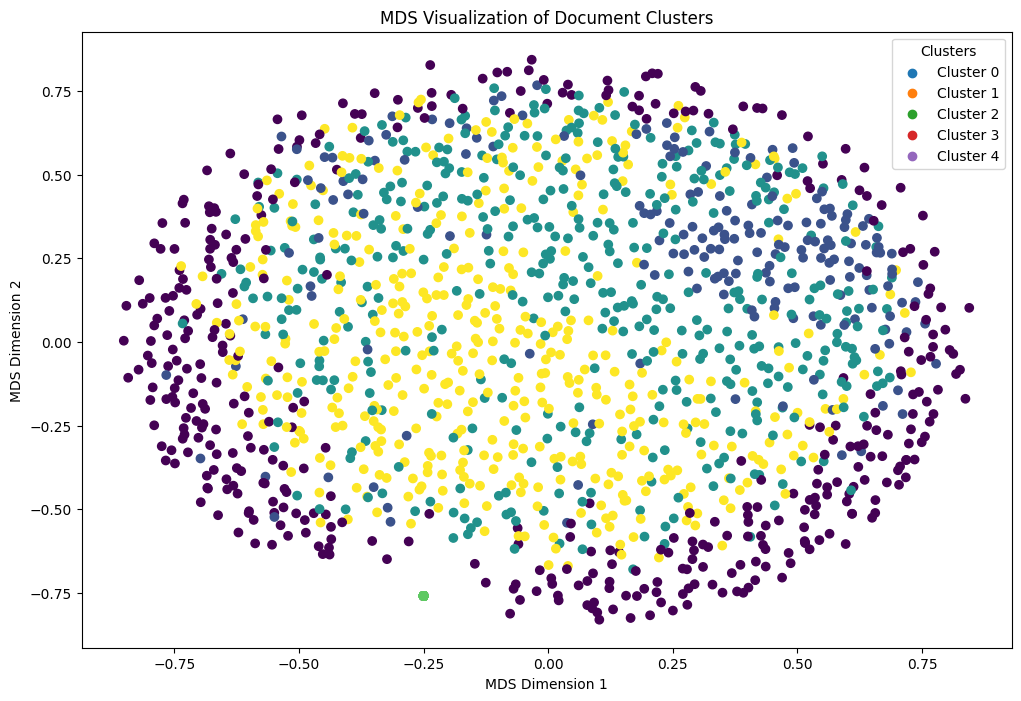

In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(1 - similarity_matrix)  # Using 1 - similarity_matrix for distance

# Extract the coordinates
xs, ys = pos[:, 0], pos[:, 1]

# Create a scatter plot of the projection
plt.figure(figsize=(12, 8))
scatter = plt.scatter(xs, ys, c=clusters)  # Color by cluster assignments

# Create labels for the clusters
labels = np.unique(clusters)
for i in labels:
    plt.scatter([], [], label='Cluster ' + str(i))

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Visualization of Document Clusters')
plt.legend(title='Clusters')
plt.show()


In [ ]:
def get_top_features_cluster(tfidf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label)  # indices for each cluster
        x_means = np.mean(tfidf_array[id_temp], axis = 0)  # mean tf-idf value for each feature in the cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats]  # indices with top features
        features = tfidf_vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

top_words_per_cluster = get_top_features_cluster(tfidf_matrix.toarray(), km.labels_, 10)  # Adjust 10 to get more or fewer words


In [ ]:
cluster_names = []
for num, df in enumerate(top_words_per_cluster):
    print(f"Cluster {num} words:")
    print(df)
    cluster_name = '-'.join(df['features'].values[:10])  # Name cluster based on top 3 words
    cluster_names.append(cluster_name)
    print(f"Named: {cluster_name}\n")

# Optionally, you can add these names to your original DataFrame
df_new5['Cluster_Name'] = [cluster_names[i] for i in clusters]


Cluster 0 words:
    features     score
0       veri  0.056242
1       good  0.050350
2    teacher  0.045115
3      great  0.042967
4        and  0.039704
5  professor  0.035562
6        the  0.033176
7         to  0.030561
8       nice  0.030131
9        guy  0.028672
Named: veri-good-teacher-great-and-professor-the-to-nice-guy

Cluster 1 words:
  features     score
0      she  0.249623
1      her  0.173352
2      the  0.086414
3      and  0.083364
4       is  0.073894
5       to  0.073345
6      you  0.053057
7     veri  0.050869
8      but  0.046898
9       in  0.043678
Named: she-her-the-and-is-to-you-veri-but-in

Cluster 2 words:
  features     score
0      the  0.145024
1      you  0.092466
2       to  0.081518
3      and  0.075580
4    class  0.067698
5       do  0.061025
6       of  0.060932
7       wa  0.053790
8       in  0.051300
9      are  0.045383
Named: the-you-to-and-class-do-of-wa-in-are

Cluster 3 words:
  features     score
0  comment  0.782910
1       no  0.622136
2

ValueError: Length of values (1534) does not match length of index (1689)

# Sentiment Analysis

In [ ]:
prof.head()

,Comment,Department,School,ProfessorName,predicted_issue
0,"Had him long ago. He was late to every class. Midterm grade was strangely low. He said - You didn't submit your paper...I said...yes, I did... and it is lying on the floor under your desk with a bunch of others. He had to add about 40 points to my grade. And adjust for all the others he had dropped on the floor. Self-centered. Oddly arrogant.",Economics department,McGill University,George Grantham Grantham,1
1,"my favourite prof at mcgill! very helpful, really knows his stuff. i suggest this class to any econ major that wants to take a break from really mathematical and dry theory classes.",Economics department,McGill University,George Grantham Grantham,0
2,Yawn.... attended class a few times but learned close to nothing. I taught myself the textbook instead.,Economics department,McGill University,George Grantham Grantham,1
3,a very poor prof to say the least; can be unduly rude in person; very impatient if you disagree with him - even on academic issues; at times a very bitter man,Economics department,McGill University,George Grantham Grantham,1
4,"I've taken his class three times now. Best class in economics. Hopefully I will get him one more time before he graduates. Don't bother with the readings, they are never on the exam.",Economics department,McGill University,George Grantham Grantham,1


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the vader_lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get the sentiment score of text
def get_sentiment_score(text):
    return sid.polarity_scores(text)

# Apply the function to the Comment column
prof['sentiment'] = prof['Comment'].apply(get_sentiment_score)

# Display the DataFrame
print(prof.head())

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


                                                                                                                                                                                                                                                                                                                                                        Comment  \
0  Had him long ago.  He was late to every class. Midterm grade was strangely low. He said - You didn't submit your paper...I said...yes, I did... and it is lying on the floor under your desk with a bunch of others.  He had to add about 40 points to my grade.  And adjust for all the others he had dropped on the floor.  Self-centered. Oddly arrogant.   
1                                                                                                                                                                       my favourite prof at mcgill!  very helpful, really knows his stuff.  i suggest this class to any econ major that wants to 

In [ ]:
prof.head()

,Comment,Department,School,ProfessorName,predicted_issue,sentiment
0,"Had him long ago. He was late to every class. Midterm grade was strangely low. He said - You didn't submit your paper...I said...yes, I did... and it is lying on the floor under your desk with a bunch of others. He had to add about 40 points to my grade. And adjust for all the others he had dropped on the floor. Self-centered. Oddly arrogant.",Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.872}"
1,"my favourite prof at mcgill! very helpful, really knows his stuff. i suggest this class to any econ major that wants to take a break from really mathematical and dry theory classes.",Economics department,McGill University,George Grantham Grantham,0,"{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.5244}"
2,Yawn.... attended class a few times but learned close to nothing. I taught myself the textbook instead.,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,a very poor prof to say the least; can be unduly rude in person; very impatient if you disagree with him - even on academic issues; at times a very bitter man,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.378, 'neu': 0.622, 'pos': 0.0, 'compound': -0.9271}"
4,"I've taken his class three times now. Best class in economics. Hopefully I will get him one more time before he graduates. Don't bother with the readings, they are never on the exam.",Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.8375}"


In [ ]:
# Function to classify sentiment based on compound score
def classify_sentiment(score):
    if score['compound'] > 0:
        return 'Positive'
    else:
        return 'Negative'

# Apply the function to the sentiment column
prof['sentiment_class'] = prof['sentiment'].apply(classify_sentiment)

# Display the DataFrame
print(prof.head())

                                                                                                                                                                                                                                                                                                                                                        Comment  \
0  Had him long ago.  He was late to every class. Midterm grade was strangely low. He said - You didn't submit your paper...I said...yes, I did... and it is lying on the floor under your desk with a bunch of others.  He had to add about 40 points to my grade.  And adjust for all the others he had dropped on the floor.  Self-centered. Oddly arrogant.   
1                                                                                                                                                                       my favourite prof at mcgill!  very helpful, really knows his stuff.  i suggest this class to any econ major that wants to 

In [ ]:
prof.head()

,Comment,Department,School,ProfessorName,predicted_issue,sentiment,sentiment_class
0,"Had him long ago. He was late to every class. Midterm grade was strangely low. He said - You didn't submit your paper...I said...yes, I did... and it is lying on the floor under your desk with a bunch of others. He had to add about 40 points to my grade. And adjust for all the others he had dropped on the floor. Self-centered. Oddly arrogant.",Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.872}",Negative
1,"my favourite prof at mcgill! very helpful, really knows his stuff. i suggest this class to any econ major that wants to take a break from really mathematical and dry theory classes.",Economics department,McGill University,George Grantham Grantham,0,"{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.5244}",Positive
2,Yawn.... attended class a few times but learned close to nothing. I taught myself the textbook instead.,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Negative
3,a very poor prof to say the least; can be unduly rude in person; very impatient if you disagree with him - even on academic issues; at times a very bitter man,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.378, 'neu': 0.622, 'pos': 0.0, 'compound': -0.9271}",Negative
4,"I've taken his class three times now. Best class in economics. Hopefully I will get him one more time before he graduates. Don't bother with the readings, they are never on the exam.",Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.8375}",Positive


In [ ]:
# Find the top 5 departments based on the count of comments
top_departments = prof['Department'].value_counts().nlargest(10).index

# Filter the dataframe to include only rows where the 'Department' is one of the top 5 departments
prof_top_departments = prof[prof['Department'].isin(top_departments)]

# Now you can perform the same analysis as before on this filtered dataframe

# Filter the dataframe to include only rows where the sentiment_class is 'Negative'
negative_comments = prof_top_departments[prof_top_departments['sentiment_class'] == 'Negative']

# Count the number of negative comments in each department
negative_counts = negative_comments['Department'].value_counts()

# Count the total number of comments in each department
total_counts = prof_top_departments['Department'].value_counts()

# Calculate the ratio of negative to total comments
negative_ratio = negative_counts / total_counts

# Sort the departments by the negative ratio in descending order
ranking = negative_ratio.sort_values(ascending=False)

print(ranking)

Economics department            0.329918
Engineering department          0.329234
Computer Science department     0.267413
Education department            0.252607
Mathematics department          0.252231
Management department           0.249347
Political Science department    0.237754
English department              0.233333
Psychology department           0.227273
History department              0.196648
Name: Department, dtype: float64


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=893dd5c2-ff0a-49e9-afe5-f4b2b61fffff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>